<h1>Задание 1</h1> 

<h2>Задание 1.1</h2>

In [1]:
# Импортирую необходимые для работы библиотеки.
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Изменение характеристик графиков:
plt.figure(figsize=(12, 6)) # Размеры.
sns.set_theme(style='whitegrid') # Стиль с белым фоном и сеткой.
sns.set_context('paper') # Контекст.

<Figure size 1200x600 with 0 Axes>

In [3]:
# Импортирую файл csv.
shopping_trends = pd.read_csv('shopping_trends.csv')

In [4]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Изменяю название колонок на рабочие.
shopping_trends.rename(columns=lambda x:x.replace(' ', '_'), inplace=True)
shopping_trends = shopping_trends.rename(columns={'Purchase_Amount_(USD)':'Purchase_Amount_USD'})

In [6]:
shopping_trends.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
# Создаю колонку All_Purchases со значениями общего количества покупок у пользователя, включая текущею.
shopping_trends['All_Purchases'] = shopping_trends.Previous_Purchases + 1

In [8]:
shopping_trends.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,All_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,15
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,24
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,50
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,32


In [9]:
# Размеры таблицы.
shopping_trends.shape

(3900, 20)

In [10]:
# Кол-во пропущенных значений.
shopping_trends.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
All_Purchases               0
dtype: int64

In [11]:
# Кол-во уникальных элементов.
shopping_trends.nunique()

Customer_ID                 3900
Age                           53
Gender                         2
Item_Purchased                25
Category                       4
Purchase_Amount_USD           81
Location                      50
Size                           4
Color                         25
Season                         4
Review_Rating                 26
Subscription_Status            2
Payment_Method                 6
Shipping_Type                  6
Discount_Applied               2
Promo_Code_Used                2
Previous_Purchases            50
Preferred_Payment_Method       6
Frequency_of_Purchases         7
All_Purchases                 50
dtype: int64

In [12]:
# Типы колонок таблицы.
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [13]:
# Описание числовых колонок.
shopping_trends.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases,All_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,26.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000,2.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,14.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,26.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,39.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,51.000000


In [14]:
# Описание строковых колонок.
shopping_trends.describe(include='object')

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_of_Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


### 10 гипотез на проверку:
1. Возраст клиента имеет влияние на количество покупок
2. Пол пользователя влияет на сумму покупки
3. Местоположение влияет на тип доставки
4. Частота покупок влияет на статус подписки
5. Сезон влияет на сумму покупки
6. Предыдущие покупки влияют на частоту покупок
7. Возраст пользователя влияет на местоположение
8. Возраст влияет на способ оплаты
9. Пол влияет на категорию купленного товара
10. Статус подписки влияет на применённую скидку

### 1) Возраст пользователя имеет влияние на количество покупок

In [15]:
# Коррелирующие колонки типа int, использую коэффициент корреляции Пирсона:
_, p_age_purchases = pearsonr(shopping_trends['Age'], shopping_trends['All_Purchases'])
print(f"Влияние возраста на количество покупок: \nЗначение p-value: {p_age_purchases:.4}")

Влияние возраста на количество покупок: 
Значение p-value: 0.01154


#### Значение p-value ниже заданного уровня значимости (0.05), значит мы можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между возрастом пользователя и количеством покупок, в пользу альтернативной.

### 2) Пол пользователя влияет на сумму покупки

In [16]:
# Создаю array-s male_purchase и female_purchase
male_purchase = shopping_trends[shopping_trends['Gender'] == 'Male']['Purchase_Amount_USD']
female_purchase = shopping_trends[shopping_trends['Gender'] == 'Female']['Purchase_Amount_USD']

In [17]:
# Сравниваю array-s численого типа, используя T-тест:
_, p_gender_purchase = ttest_ind(male_purchase, female_purchase)
print(f"Влияние пола на сумму покупки: \nЗначение p-value: {p_gender_purchase:.4}")

Влияние пола на сумму покупки: 
Значение p-value: 0.3806


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между полом пользователя и суммой его покупок.

### 3) Местоположение пользователя влияет на тип доставки

In [18]:
# Колонки типа object, создаю таблицу сопряженности и использую Хи-квадрат:
_, p_location_shipping, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Location'], shopping_trends['Shipping_Type']))
print(f"Влияние местоположения на тип доставки: \nЗначение p-value: {p_location_shipping:.4}")

Влияние местоположения на тип доставки: 
Значение p-value: 0.8808


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между местоположением клиента и типом доставки.

### 4) Частота покупок влияет на статус подписки

In [19]:
# Колонки типа int и object, создаю таблицу сопряженности и использую Хи-квадрат:
_, p_frequency_subscription, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Frequency_of_Purchases'], shopping_trends['Subscription_Status']))
print(f"Влияние частоты покупок на статус подписки: \nЗначение p-value: {p_frequency_subscription:.4}")

Влияние частоты покупок на статус подписки: 
Значение p-value: 0.6909


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между частотой покупок и статусом подписки.

### 5) Сезон влияет на сумму покупки

In [20]:
# Колонки типа object и int, создаю таблицу сопряженности и использую Хи-квадрат:
_, p_season_purchase, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Season'], shopping_trends['Purchase_Amount_USD']))
print(f"Влияние сезона на сумму покупки: \nЗначение p-value: {p_season_purchase:.4}")

Влияние сезона на сумму покупки: 
Значение p-value: 0.0244


#### Значение p-value ниже заданного уровня значимости (0.05), значит мы можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между сезоном года и суммой покупок, в пользу альтернативной.

### 6) Предыдущие покупки влияют на частоту покупок

In [21]:
# Колонки типа int и object, создаю таблицу сопряженности и использую Хи-квадрат:
_, p_previous_frequency, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Previous_Purchases'], shopping_trends['Frequency_of_Purchases']))
print(f"Влияние количества предыдущих покупкок на частоту покупок: \nЗначение p-value: {p_previous_frequency:.4}")

Влияние количества предыдущих покупкок на частоту покупок: 
Значение p-value: 0.431


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между предыдущими покупками и частотой покупок.

### 7) Возраст пользователя влияет на местоположение

In [22]:
# Колонки типа int и object.
# Разбиваю на промежутки колонку Age.
# Создаю таблицу сопряженности и использую Хи-квадрат:
_, p_age_location, _, _ = chi2_contingency(pd.crosstab(pd.cut(shopping_trends['Age'], bins=[0, 18, 35, 65]), shopping_trends['Location']))
print(f"Влияние возраста на местоположение: \nЗначение p-value: {p_age_location:.4}")

Влияние возраста на местоположение: 
Значение p-value: 0.8284


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между возрастом пользователя и его местоположением.

### 8) Возраст пользователя влияет на способ оплаты

In [23]:
# Колонки типа int и object.
# Разбиваю на промежутки колонку Age.
# Создаю таблицу сопряженности и использую Хи-квадрат:
_, p_age_payment, _, _ = chi2_contingency(pd.crosstab(pd.cut(shopping_trends['Age'], bins=[0, 18, 35, 65]), shopping_trends['Payment_Method']))
print(f"Влияние возраста на способ оплаты: \nЗначение p-value: {p_age_payment:.4}")

Влияние возраста на способ оплаты: 
Значение p-value: 0.5964


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между возрастом пользователя и способом оплаты.

### 9) Пол пользователя влияет на категорию купленного товара

In [24]:
_, p_gender_category, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Gender'], shopping_trends['Category']))
print(f"Влияние пола на категорию товара: \nЗначение p-value: {p_gender_category:.4}")

Влияние пола на категорию товара: 
Значение p-value: 0.8968


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между пол пользователя и категорией купленного товара.

### 10) Статус подписки влияет на применённую скидку

In [25]:
# Колонки типа object и object, создаю таблицу сопряженности и использую Хи-квадрат:
_, p_subscription_discount, _, _ = chi2_contingency(pd.crosstab(shopping_trends['Subscription_Status'], shopping_trends['Discount_Applied']))
print(f"Влияние статуса подписки на применённую скидку: \nЗначение p-value: {p_subscription_discount:.4}")

Влияние статуса подписки на применённую скидку: 
Значение p-value: 0.0


#### Значение p-value ниже заданного уровня значимости (0.05), значит мы можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между статусом подписки и применённой скидкой, в пользу альтернативной.

<h2>Задание 1.2</h2>

## 1) 

In [26]:
# Нахожу количество покупок у каждого товара.
number_orders_product = shopping_trends.Item_Purchased.value_counts().reset_index()
number_orders_product.head()

,Item_Purchased,count
0,Blouse,171
1,Pants,171
2,Jewelry,171
3,Shirt,169
4,Dress,166


In [27]:
# Нахожу наибольшее число покупок среди товаров.
max_count_purchases = number_orders_product['count'].max()

In [28]:
# Нахожу продукты, которые продали наибольшее кол-во раз.
max_number_orders_product = number_orders_product.query('count == @max_count_purchases')

In [29]:
# Чтобы более красиво вывести названия товаров, использую ''.join.
keys = ', '.join(max_number_orders_product['Item_Purchased'])

In [30]:
print(f'Максимальное количество заказов товара равно {max_count_purchases}')
print(f'Самые популярные товары: {keys}')

Максимальное количество заказов товара равно 171
Самые популярные товары: Blouse, Pants, Jewelry


## 2)

In [31]:
# Нахожу кол-во представителей от каждого пола
distribution_buyers_gender = shopping_trends.groupby('Gender', as_index=False) \
.agg({'Item_Purchased':'count'})

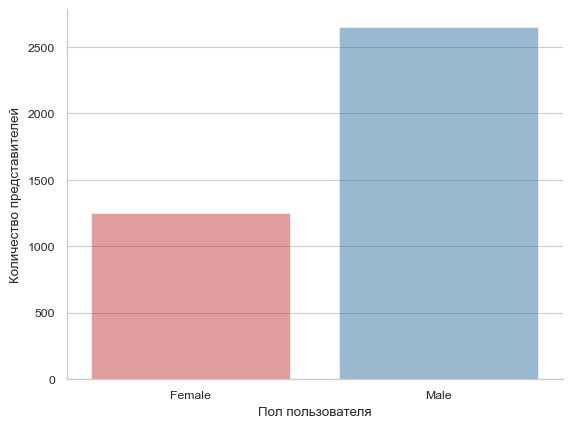

In [32]:
# Устанавливаю голубой и розовый цвет для пользователей мужского и женского пола.
# (Из-за увеличения прозрачности синий и красный окажутся соответсвенно искомыми )
palette = {
'Male': '#1f77b4',
'Female': '#d62728' 
}
# Строю барплот, с прозрачностью 0.5, без легенды, разделяя данные на подгруппы по полу.
ax = sns.barplot(x='Gender', y='Item_Purchased', data=distribution_buyers_gender, alpha=0.5, hue='Gender', palette=palette, legend=False)
# Переименовываю оси X и Y.
ax.set(xlabel='Пол пользователя', ylabel='Количество представителей') 
# Удаляю границы графика и вывожу его.
sns.despine()
plt.show()

## 3)

### Определение по полу

In [33]:
# Нахожу кол-во общего числа покупок у представителей каждого пола.
largest_number_total_purchases_gender = shopping_trends.groupby('Gender', as_index=False) \
.agg({'All_Purchases':'sum'}) \
.sort_values('All_Purchases', ascending=False) \
.rename(columns={'All_Purchases': 'quantity_goods_purchased'})
largest_number_total_purchases_gender.head()

,Gender,quantity_goods_purchased
1,Male,70827
0,Female,31944


In [34]:
# Нахожу какой пол покупает в целом больше всего товаров.
gender_buys_the_most_goods = largest_number_total_purchases_gender.Gender.iloc[0]

In [35]:
print(f'{gender_buys_the_most_goods} больше всех покупают товары')

Male больше всех покупают товары


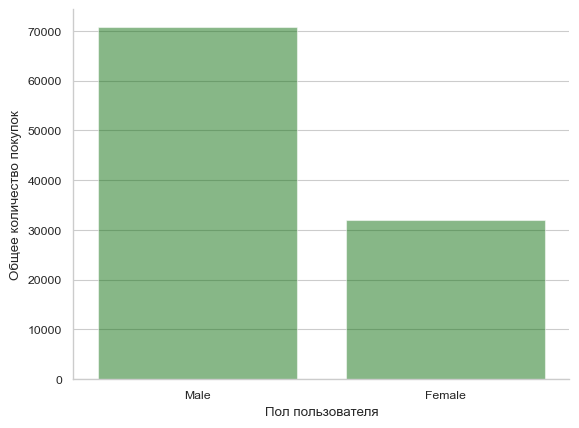

In [36]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Gender', y='quantity_goods_purchased', data=largest_number_total_purchases_gender, color='green', alpha=0.5)
ax.set(xlabel='Пол пользователя', ylabel='Общее количество покупок')
sns.despine()
plt.show()

In [37]:
# Нахожу кол-во раз, когда представители каждого пола покупали товары чаще всего (еженедельно).
buys_more_goods_week_gender_df = shopping_trends.query('Frequency_of_Purchases == "Weekly"') \
    .groupby('Gender', as_index=False) \
    .agg({'Item_Purchased':'count'}) \
    .sort_values('Item_Purchased', ascending=False) \
    .rename(columns={'Item_Purchased': 'number_most_frequent_buyers'})
buys_more_goods_week_gender_df.head()

,Gender,number_most_frequent_buyers
1,Male,367
0,Female,172


In [38]:
# Нахожу какой пол покупает товары чаще всего.
buys_more_goods_week_gender = buys_more_goods_week_gender_df.Gender.iloc[0]

In [39]:
print(f'{buys_more_goods_week_gender} чаще всех покупают товары')

Male чаще всех покупают товары


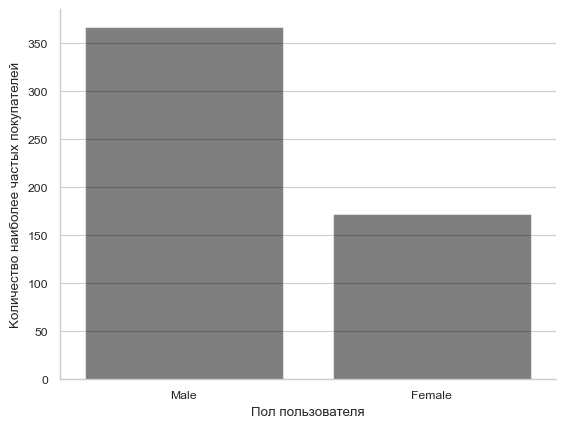

In [40]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Gender', y='number_most_frequent_buyers', data=buys_more_goods_week_gender_df, color='black', alpha=0.5)
ax.set(xlabel='Пол пользователя', ylabel='Kоличество наиболее частых покупателей')
sns.despine()
plt.show()

In [41]:
# Устанавливаю уровень определения дорогих товаров на 90-м процентиле цен покупок.
percentile_90th = shopping_trends.Purchase_Amount_USD.quantile(q=0.9)
percentile_90th

np.float64(93.0)

In [42]:
# Нахожу кол-во раз, когда представители каждого пола купили дорогие товары.
buy_most_expensive_goods_gender_df = shopping_trends.query('Purchase_Amount_USD >= @percentile_90th') \
.groupby('Gender', as_index=False) \
.agg({'Item_Purchased':'count'}) \
.sort_values('Item_Purchased', ascending=False) \
.rename(columns={'Item_Purchased': 'number_most_expensive_goods'})
buy_most_expensive_goods_gender_df.head()

,Gender,number_most_expensive_goods
1,Male,277
0,Female,130


In [43]:
# Нахожу какой пол покупает дорогие товары чаще всего.
buy_most_expensive_goods_gender = buy_most_expensive_goods_gender_df.Gender.iloc[0]

In [44]:
print(f'{buy_most_expensive_goods_gender} больше всех покупают дорогие товары')

Male больше всех покупают дорогие товары


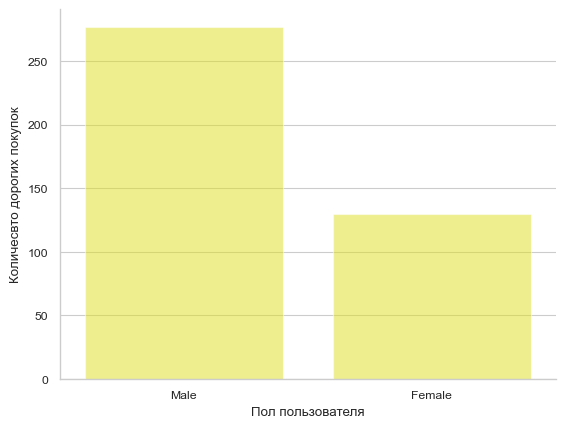

In [45]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Gender', y='number_most_expensive_goods', data=buy_most_expensive_goods_gender_df, color='yellow', alpha=0.5)
ax.set(xlabel='Пол пользователя', ylabel='Количесвто дорогих покупок')
sns.despine()
plt.show()

### Определение по возрасту

In [46]:
# С помощью функции classify_age подразделяю покупателей на основе их возраста 
# на возрастные промежутки 0-17, 18-34, 35-64 и 65+.

def classify_age(age):
    if 0 <= age <= 17:
        return '0-17'
    elif 18 <= age <= 34:
        return '18-34'
    elif 35 <= age <= 64:
        return '35-64'
    elif 65 <= age:
        return '65+'

# Создаю отдельную колонку с классификацией.
shopping_trends['Age_Classification'] = shopping_trends['Age'].apply(classify_age)
shopping_trends.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,...,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,All_Purchases,Age_Classification
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,15,35-64
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,3,18-34
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,24,35-64
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,50,18-34
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,32,35-64


In [47]:
# Нахожу кол-во общего числа покупок у представителей каждой возрастной группы.
largest_number_total_purchases_age_classification = shopping_trends.groupby('Age_Classification', as_index=False) \
.agg({'All_Purchases':'sum'}) \
.sort_values('All_Purchases', ascending=False) \
.rename(columns={'All_Purchases': 'quantity_goods_purchased'})
largest_number_total_purchases_age_classification.head()

,Age_Classification,quantity_goods_purchased
1,35-64,59160
0,18-34,31916
2,65+,11695


In [48]:
# Нахожу какая возрастная группа покупает товары больше всего.
age_category_buys_most_goods = largest_number_total_purchases_age_classification.Age_Classification.iloc[0]

In [49]:
print(f'Возрастаная категория {age_category_buys_most_goods} больше всех покупает товары')

Возрастаная категория 35-64 больше всех покупает товары


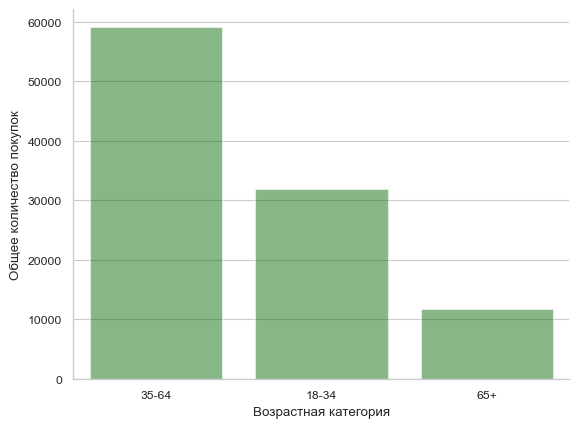

In [50]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Age_Classification', y='quantity_goods_purchased', data=largest_number_total_purchases_age_classification, color='green', alpha=0.5)
ax.set(xlabel='Возрастная категория', ylabel='Общее количество покупок')
sns.despine()
plt.show()

In [51]:
# Нахожу кол-во раз, когда представители каждой возрастной группы покупали товары чаще всего (еженедельно)
age_category_buys_more_goods_week_df = shopping_trends.query('Frequency_of_Purchases == "Weekly"') \
.groupby('Age_Classification', as_index=False) \
.agg({'Purchase_Amount_USD':'count'}) \
.sort_values('Purchase_Amount_USD', ascending=False) \
.rename(columns={'Purchase_Amount_USD': 'number_most_frequent_buyers'})
age_category_buys_more_goods_week_df.head()

,Age_Classification,number_most_frequent_buyers
1,35-64,321
0,18-34,156
2,65+,62


In [52]:
# Нахожу какая возрастная группа покупает товары чаще всего.
age_category_buys_more_goods_week = age_category_buys_more_goods_week_df.Age_Classification.iloc[0]

In [53]:
print(f'Возрастная категория {age_category_buys_more_goods_week} чаще всех покупает товары')

Возрастная категория 35-64 чаще всех покупает товары


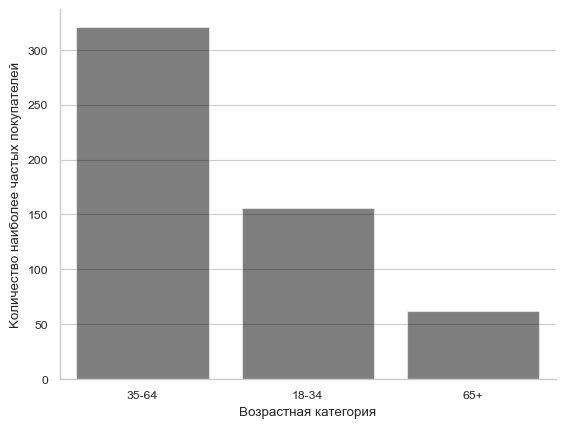

In [54]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Age_Classification', y='number_most_frequent_buyers', data=age_category_buys_more_goods_week_df, color='black', alpha=0.5)
ax.set(xlabel='Возрастная категория', ylabel='Kоличество наиболее частых покупателей')
sns.despine()
plt.show()

In [55]:
# Нахожу кол-во раз, когда представители каждой возрастной группы купили дорогие товары.
age_category_buy_most_expensive_goods_df = shopping_trends.query('Purchase_Amount_USD >= @percentile_90th') \
.groupby('Age_Classification', as_index=False) \
.agg({'All_Purchases':'count'}) \
.sort_values('All_Purchases', ascending=False) \
.rename(columns={'All_Purchases': 'number_most_expensive_goods'})
age_category_buy_most_expensive_goods_df.head()

,Age_Classification,number_most_expensive_goods
1,35-64,230
0,18-34,130
2,65+,47


In [56]:
# Нахожу какая возрастная группа покупает дорогие товары чаще всего.
age_category_buy_most_expensive_goods = age_category_buy_most_expensive_goods_df.Age_Classification.iloc[0]

In [57]:
print(f'Возрастная категория {age_category_buy_most_expensive_goods} больше всех покупает дорогие товары')

Возрастная категория 35-64 больше всех покупает дорогие товары


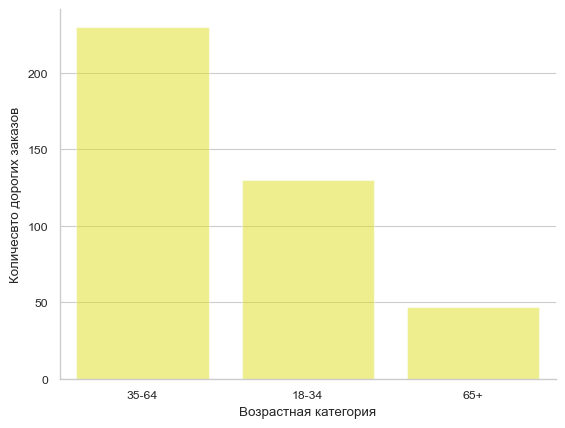

In [58]:
# Для наглядности строю барплот.
ax = sns.barplot(x='Age_Classification', y='number_most_expensive_goods', data=age_category_buy_most_expensive_goods_df, color='yellow', alpha=0.5)
ax.set(xlabel='Возрастная категория', ylabel='Количесвто дорогих заказов')
sns.despine()
plt.show()

## 4)

In [59]:
# Создаю таблицу сопряженности сезона и цвета товара заказа.
table_of_relationships = pd.crosstab(shopping_trends['Season'], shopping_trends['Color'])
table_of_relationships.head()

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Season,,,,,,,,,,,,,,,,,,,,,
Fall,34,42,32,35,32,43,36,44,37,37,...,42,35,37,42,39,40,27,44,27,50
Spring,39,43,39,33,42,42,38,48,38,37,...,38,44,43,31,37,46,41,45,36,40
Summer,37,42,46,33,36,42,30,40,44,32,...,24,29,38,36,59,49,36,40,43,38
Winter,37,40,35,40,43,39,34,27,50,41,...,45,45,33,39,38,37,41,37,36,46


In [60]:
# Примененяю тест хи-квадрат.
_, p_value, _, _ = chi2_contingency(table_of_relationships)

In [61]:
print(f"Значение p-value: {p_value:.4}")

Значение p-value: 0.7186


#### Значение p-value выше заданного уровня значимости (0.05), значит мы не можем отвергнуть нулевую гипотезу о том, что существует статистически значимая зависимость между цветом одежды и сезоном.

## 5)

In [62]:
# Устанавливаю порядок сезонов.
season_order = ["Spring", "Summer", "Fall", "Winter"]
shopping_trends["Season"] = pd.Categorical(shopping_trends["Season"], categories=season_order, ordered=True)

In [63]:
# В каждом сезоне нахожу число уникальных пользователей.
mau = shopping_trends.groupby('Season', as_index=False, observed=False) \
.agg({'Customer_ID':'nunique'}) \
.rename(columns={'Customer_ID': 'number_unique_users'})
mau.head()

,Season,number_unique_users
0,Spring,999
1,Summer,955
2,Fall,975
3,Winter,971


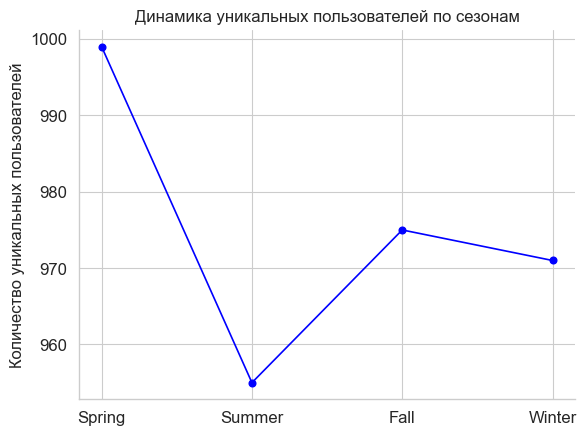

In [64]:
# Строю график для наглядности.
plt.plot(mau['Season'], mau['number_unique_users'], marker='o', linestyle='-', color='blue', label='Unique Users')
plt.title('Динамика уникальных пользователей по сезонам', fontsize=12)
# Не пишу название оси X (Оно понятно интуитивно).
plt.ylabel('Количество уникальных пользователей', fontsize=12)
# Отображаю сетку на графике и удаляю границы графика.
ax.grid(True) 
sns.despine() 
# Устанавливаю размер меток для осей.
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

In [65]:
# Создаю колонку динамики mau, устанавливая вместо первого значения 0.
mau['user_dynamics'] = mau['number_unique_users'].diff().fillna(0)

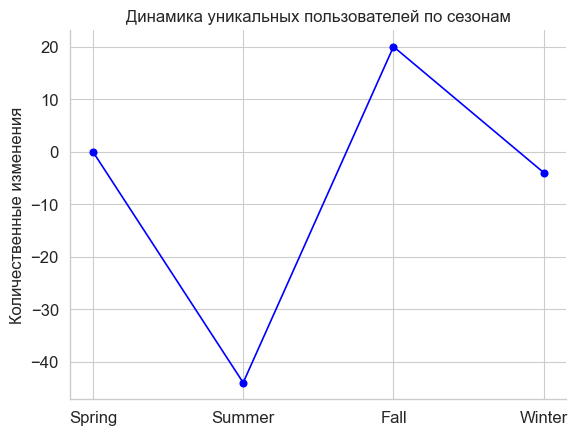

In [66]:
# Строю график для наглядности.
plt.plot(mau['Season'], mau['user_dynamics'], marker='o', linestyle='-', color='blue', label='Unique Users')
plt.title('Динамика уникальных пользователей по сезонам', fontsize=12)
plt.ylabel('Количественные изменения', fontsize=12)
ax.grid(True) 
sns.despine() 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

## 6)

In [67]:
# Объединяю все названия товаров.
combined_names = ''.join(shopping_trends['Item_Purchased'])

In [68]:
# Создаю словарь для подсчёта кол-ва букв.
count_letters = dict()

In [69]:
# Использую цикл for, прохожусь по каждому символу в строке.
# Если это буква, то придаю ей нижний регистр.
# Если такая буква уже была, то прибавляю к числу встреч +1, если нет, то добавляю в словарь.
for letter in combined_names:
    if letter.isalpha(): 
        letter = letter.lower() 
        if letter in count_letters:
            count_letters[letter] += 1
        else:
            count_letters[letter] = 1

In [70]:
count_letters

{'b': 772,
 'l': 964,
 'o': 1528,
 'u': 332,
 's': 4063,
 'e': 2347,
 'w': 335,
 'a': 2312,
 't': 1896,
 'r': 1434,
 'j': 458,
 'n': 914,
 'd': 630,
 'k': 911,
 'h': 1081,
 'i': 625,
 'c': 926,
 'g': 454,
 'p': 314,
 'y': 171,
 'f': 157,
 'v': 140}

In [71]:
# С помощью lambda-функции нахожу самую частую букву и кол-во её использвания в названиях товаров.
most_popular_letter = sorted(count_letters.items(), key=lambda value: value[1], reverse=True)[0]
print(f"Самая популярная буква в названии одежды: '{most_popular_letter[0]}', она встречается {most_popular_letter[1]} раз")

Самая популярная буква в названии одежды: 's', она встречается 4063 раз


<h1>Задание 2</h1> 

In [72]:
drinks = pd.read_csv('drinks.csv')

In [73]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [74]:
drinks.shape

(193, 5)

In [75]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [76]:
drinks.nunique()

country                         193
beer_servings                   130
spirit_servings                 109
wine_servings                    79
total_litres_of_pure_alcohol     90
dtype: int64

In [77]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [78]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [79]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


#### Создаю колонки с количеством выпитого алкоголя по странам, без счёта определённой категории.

In [80]:
drinks['amount_alcohol_other_beer'] = drinks.spirit_servings + drinks.wine_servings

In [81]:
drinks['amount_alcohol_other_spirit'] = drinks.beer_servings + drinks.wine_servings

In [82]:
drinks['amount_alcohol_other_wine'] = drinks.beer_servings + drinks.spirit_servings

In [83]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,amount_alcohol_other_beer,amount_alcohol_other_spirit,amount_alcohol_other_wine
0,Afghanistan,0,0,0,0.0,0,0,0
1,Albania,89,132,54,4.9,186,143,221
2,Algeria,25,0,14,0.7,14,39,25
3,Andorra,245,138,312,12.4,450,557,383
4,Angola,217,57,45,5.9,102,262,274


#### Нахожу в каких странах соответственно потребляют больше пива, крепкого алкоголя или вина, чем всего другого алкоголя.

In [84]:
drink_more_beer = drinks.query('beer_servings > amount_alcohol_other_beer')

In [85]:
# Чтобы вывести названия стран, использую ''.join.
countries_drink_more_beer = ', '.join(drink_more_beer['country'])

In [86]:
print(f'В этих странах: \n{countries_drink_more_beer} \nлюди больше пьют пиво, чем другие алкогольные напитки')

В этих странах: 
Algeria, Angola, Austria, Belize, Benin, Bhutan, Bolivia, Botswana, Brazil, Brunei, Burkina Faso, Burundi, Cote d'Ivoire, Cabo Verde, Cameroon, Canada, Central African Republic, Chad, Colombia, Congo, Costa Rica, Czech Republic, DR Congo, Dominican Republic, Ecuador, Egypt, Eritrea, Ethiopia, Fiji, Finland, Gabon, Gambia, Germany, Ghana, Guinea, Iceland, Indonesia, Iraq, Ireland, Kenya, Latvia, Lesotho, Lithuania, Madagascar, Malaysia, Mali, Mauritius, Mexico, Mozambique, Myanmar, Namibia, Nauru, Nigeria, Oman, Palau, Panama, Papua New Guinea, Paraguay, Poland, South Korea, Romania, Rwanda, Samoa, Senegal, Serbia, Seychelles, Sierra Leone, Singapore, Solomon Islands, South Africa, Spain, Swaziland, Togo, Tonga, Trinidad & Tobago, Tunisia, Turkey, Uganda, Tanzania, USA, Venezuela, Vietnam, Yemen, Zambia, Zimbabwe 
люди больше пьют пиво, чем другие алкогольные напитки


In [87]:
drink_more_spirit = drinks.query('spirit_servings > amount_alcohol_other_spirit')

In [88]:
countries_drink_more_spirit = ', '.join(drink_more_spirit['country'])

In [89]:
print(f'В этих странах: \n{countries_drink_more_spirit} \nлюди больше пьют крепкие алкогольные напитки, чем другие алкогольные напитки')

В этих странах: 
Armenia, Azerbaijan, Bahamas, Bahrain, Belarus, Bosnia-Herzegovina, Cambodia, China, Comoros, Cook Islands, Cuba, Djibouti, Dominica, El Salvador, Grenada, Guatemala, Guyana, Haiti, Honduras, India, Jamaica, Japan, Jordan, Kazakhstan, Kiribati, Kyrgyzstan, Lebanon, Liberia, Malawi, Mongolia, Nepal, Nicaragua, Niue, Philippines, Qatar, Moldova, Russian Federation, St. Lucia, St. Vincent & the Grenadines, Saudi Arabia, Sri Lanka, Sudan, Suriname, Syria, Tajikistan, Thailand, Turkmenistan, Tuvalu, United Arab Emirates, Uzbekistan 
люди больше пьют крепкие алкогольные напитки, чем другие алкогольные напитки


In [90]:
drink_more_wine = drinks.query('wine_servings > amount_alcohol_other_wine')

In [91]:
countries_drink_more_wine = ', '.join(drink_more_wine['country'])

In [92]:
print(f'В этих странах: \n{countries_drink_more_wine} \nлюди больше пьют вино, чем другие алкогольные напитки')

В этих странах: 
Argentina, Equatorial Guinea, France, Italy, Laos, Portugal, Sao Tome & Principe, Timor-Leste, Uruguay 
люди больше пьют вино, чем другие алкогольные напитки


<h1>Задание 3</h1> 

In [93]:
tarantino = pd.read_csv('tarantino.csv')

In [94]:
tarantino.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [95]:
tarantino = tarantino.rename(columns={'word':'curse'})

In [96]:
tarantino.head()

,movie,type,curse,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [97]:
tarantino.shape

(1894, 4)

In [98]:
# Есть пустые значения в колонке curse, т.к. тогда были смерти (type=death) а не проклятия.
tarantino.isna().sum()

movie           0
type            0
curse         190
minutes_in      0
dtype: int64

In [99]:
tarantino.nunique()

movie            7
type             2
curse           60
minutes_in    1690
dtype: int64

In [100]:
tarantino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   curse       1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [101]:
tarantino.describe()

,minutes_in
count,1894.000000
mean,71.529071
std,45.075036
min,0.400000
25%,29.655000
50%,70.525000
75%,112.835000
max,160.450000


In [102]:
tarantino.describe(include='object')

,movie,type,curse
count,1894,1894,1704
unique,7,2,60
top,Pulp Fiction,word,fucking
freq,476,1704,407


## 1) 

In [103]:
# Нахожу для каждого фильма число смертей и проклятий.
ratio_by_films = tarantino.groupby('movie', as_index=False) \
.type.value_counts() \
.pivot(index='movie', columns='type', values='count') \
.rename(columns={'word':'curse'}) \
.reset_index()

In [104]:
# Нахожу соотношение по фильмам.
ratio_by_films['curse_to_death_ratio'] = round(ratio_by_films.death / ratio_by_films.curse, 2)

In [105]:
# С помощью итерации по строкам осуществляю красивый вывод.
for none, row in ratio_by_films.iterrows():
    print(
        f"В фильме '{row['movie']}' количество смертей: {row['death']}, "
        f"количество проклятий: {row['curse']}, их соотношение равняется {row['curse_to_death_ratio']:.2f}."
    )

В фильме 'Django Unchained' количество смертей: 47, количество проклятий: 262, их соотношение равняется 0.18.
В фильме 'Inglorious Basterds' количество смертей: 48, количество проклятий: 58, их соотношение равняется 0.83.
В фильме 'Jackie Brown' количество смертей: 4, количество проклятий: 368, их соотношение равняется 0.01.
В фильме 'Kill Bill: Vol. 1' количество смертей: 63, количество проклятий: 57, их соотношение равняется 1.11.
В фильме 'Kill Bill: Vol. 2' количество смертей: 11, количество проклятий: 69, их соотношение равняется 0.16.
В фильме 'Pulp Fiction' количество смертей: 7, количество проклятий: 469, их соотношение равняется 0.01.
В фильме 'Reservoir Dogs' количество смертей: 10, количество проклятий: 421, их соотношение равняется 0.02.


In [106]:
# Коррелирующие колонки типа int, использую коэффициент корреляции Пирсона:
statistic_death_curse, p_death_curse = pearsonr(ratio_by_films['death'], ratio_by_films['curse'])
print(f"Корреляция возраста и количества покупок: \nКоэффициент корреляции Пирсона:{statistic_death_curse:.4} \nЗначение p-value: {p_death_curse:.4}")

Корреляция возраста и количества покупок: 
Коэффициент корреляции Пирсона:-0.6674 
Значение p-value: 0.1014


#### Значение p-value выше заданного уровня значимости (0.05), значит можно сделать вывод, что не существует статистически значимой зависимости между возрастом пользователя и количеством покупок.

## 2)

#### Частота употребления конкретных проклятий в абсолютных значениях.

In [107]:
frequency_curse_absolute = tarantino.groupby('curse').size().reset_index(name='frequency')

In [108]:
frequency_curse_absolute = frequency_curse_absolute.sort_values(by='frequency', ascending=False)

In [109]:
for none, row in frequency_curse_absolute.iterrows():
    print(f"Проклятие '{row['curse']}' использовано {row['frequency']} раз(а).")

Проклятие 'fucking' использовано 407 раз(а).
Проклятие 'shit' использовано 221 раз(а).
Проклятие 'fuck' использовано 213 раз(а).
Проклятие 'n-word ' использовано 179 раз(а).
Проклятие 'ass' использовано 140 раз(а).
Проклятие 'goddamn' использовано 113 раз(а).
Проклятие 'motherfucker' использовано 70 раз(а).
Проклятие 'bitch' использовано 64 раз(а).
Проклятие 'hell' использовано 45 раз(а).
Проклятие 'damn' использовано 37 раз(а).
Проклятие 'motherfucking' использовано 27 раз(а).
Проклятие 'fucked' использовано 25 раз(а).
Проклятие 'motherfuckers' использовано 15 раз(а).
Проклятие 'bullshit' использовано 15 раз(а).
Проклятие 'dick' использовано 14 раз(а).
Проклятие 'pussy' использовано 11 раз(а).
Проклятие 'bastard' использовано 10 раз(а).
Проклятие 'asshole' использовано 10 раз(а).
Проклятие 'bitches' использовано 9 раз(а).
Проклятие 'fucker' использовано 8 раз(а).
Проклятие 'dicks' использовано 5 раз(а).
Проклятие 'assholes' использовано 5 раз(а).
Проклятие 'negro ' использовано 5 раз(

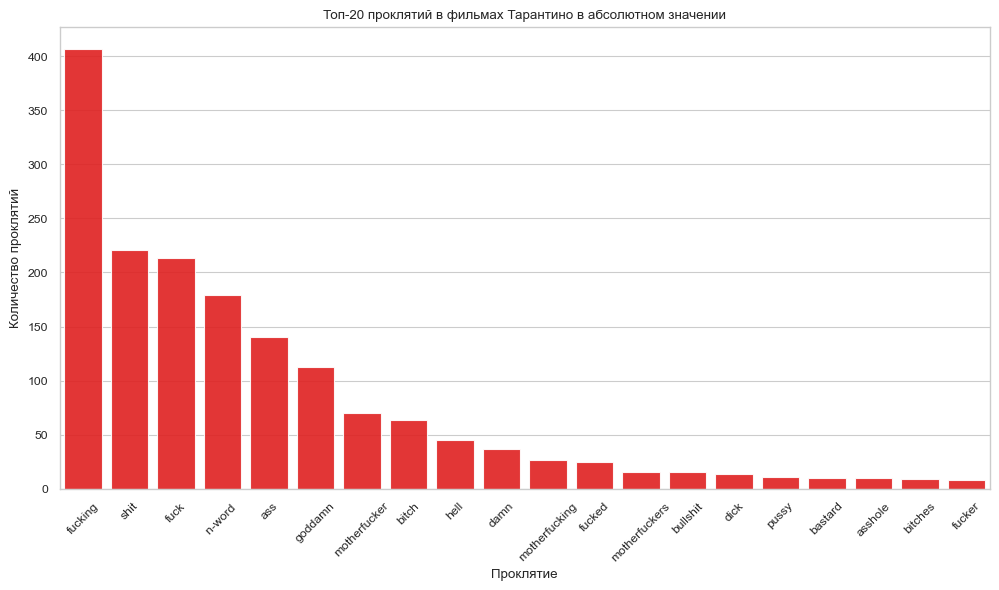

In [110]:
# Визуализация абсолютного значения (Топ-20).
plt.figure(figsize=(12, 6))
top_curses_absolute = frequency_curse_absolute.head(20)
ax = sns.barplot(x='curse', y='frequency', data=top_curses_absolute, color='red', alpha=0.9, legend=False)
ax.set(xlabel='Проклятие', ylabel='Количество проклятий') 
plt.title('Топ-20 проклятий в фильмах Тарантино в абсолютном значении')
plt.xticks(rotation=45)
plt.show()

#### Частота употребления конкретных проклятий в процентном соотношении относительно всех проклятий.

In [111]:
frequency_curse_proportion = tarantino.curse.value_counts(normalize=True).mul(100).reset_index()

In [112]:
for none, row in frequency_curse_proportion.iterrows():
    print(f"Проклятие '{row['curse']}' занимает {round(row['proportion'], 2)}% от всех проклятий.")

Проклятие 'fucking' занимает 23.88% от всех проклятий.
Проклятие 'shit' занимает 12.97% от всех проклятий.
Проклятие 'fuck' занимает 12.5% от всех проклятий.
Проклятие 'n-word ' занимает 10.5% от всех проклятий.
Проклятие 'ass' занимает 8.22% от всех проклятий.
Проклятие 'goddamn' занимает 6.63% от всех проклятий.
Проклятие 'motherfucker' занимает 4.11% от всех проклятий.
Проклятие 'bitch' занимает 3.76% от всех проклятий.
Проклятие 'hell' занимает 2.64% от всех проклятий.
Проклятие 'damn' занимает 2.17% от всех проклятий.
Проклятие 'motherfucking' занимает 1.58% от всех проклятий.
Проклятие 'fucked' занимает 1.47% от всех проклятий.
Проклятие 'motherfuckers' занимает 0.88% от всех проклятий.
Проклятие 'bullshit' занимает 0.88% от всех проклятий.
Проклятие 'dick' занимает 0.82% от всех проклятий.
Проклятие 'pussy' занимает 0.65% от всех проклятий.
Проклятие 'bastard' занимает 0.59% от всех проклятий.
Проклятие 'asshole' занимает 0.59% от всех проклятий.
Проклятие 'bitches' занимает 0.5

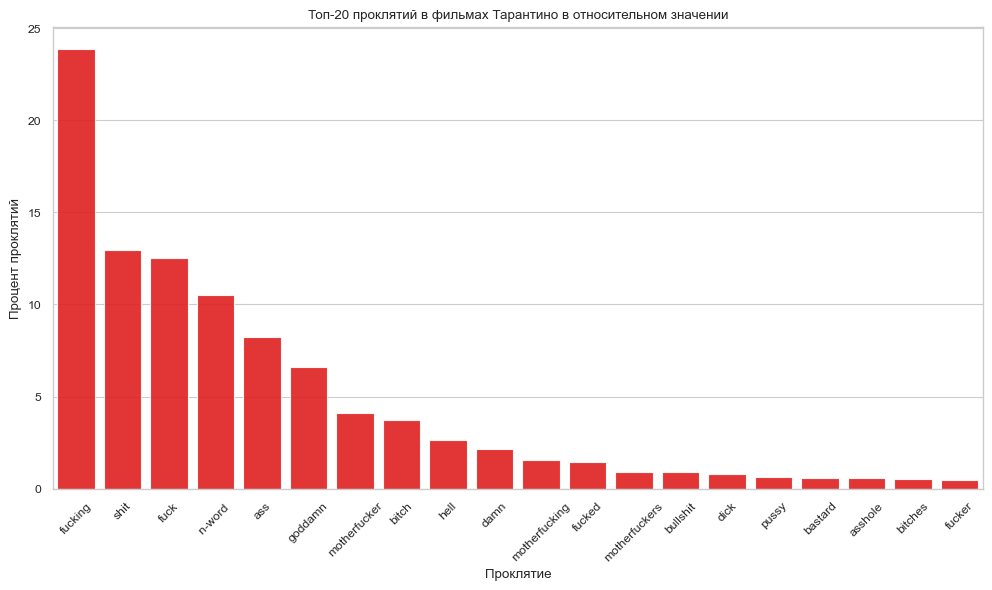

In [113]:
# Визуализация относительных значений (Топ-20).
plt.figure(figsize=(12, 6))
top_curses_proportion = frequency_curse_proportion.head(20)
ax = sns.barplot(x='curse', y='proportion', data=top_curses_proportion, color='red', alpha=0.9, legend=False)
ax.set(xlabel='Проклятие', ylabel='Процент проклятий') 
plt.title('Топ-20 проклятий в фильмах Тарантино в относительном значении')
plt.xticks(rotation=45)
plt.show()

## 3)

In [114]:
distribution_time_between_curses = tarantino.query('type == "word"').groupby('movie')['minutes_in'].apply(lambda x: round(x.diff(), 2)).reset_index()

In [115]:
distribution_time_between_curses = distribution_time_between_curses.groupby('minutes_in').size().reset_index(name='count')

In [116]:
distribution_time_between_curses = distribution_time_between_curses.sort_values(by='count', ascending=False)

In [117]:
for none, row in distribution_time_between_curses.iterrows():
    print(f"Спустя {row['minutes_in']} минут(ы) произносилось в сумме {round(row['count'])} проклятия(е).")

Спустя 0.05 минут(ы) произносилось в сумме 142 проклятия(е).
Спустя 0.02 минут(ы) произносилось в сумме 119 проклятия(е).
Спустя 0.03 минут(ы) произносилось в сумме 112 проклятия(е).
Спустя 0.1 минут(ы) произносилось в сумме 86 проклятия(е).
Спустя 0.0 минут(ы) произносилось в сумме 81 проклятия(е).
Спустя 0.07 минут(ы) произносилось в сумме 67 проклятия(е).
Спустя 0.01 минут(ы) произносилось в сумме 66 проклятия(е).
Спустя 0.04 минут(ы) произносилось в сумме 59 проклятия(е).
Спустя 0.08 минут(ы) произносилось в сумме 51 проклятия(е).
Спустя 0.12 минут(ы) произносилось в сумме 40 проклятия(е).
Спустя 0.15 минут(ы) произносилось в сумме 40 проклятия(е).
Спустя 0.06 минут(ы) произносилось в сумме 35 проклятия(е).
Спустя 0.25 минут(ы) произносилось в сумме 32 проклятия(е).
Спустя 0.13 минут(ы) произносилось в сумме 30 проклятия(е).
Спустя 0.09 минут(ы) произносилось в сумме 25 проклятия(е).
Спустя 0.17 минут(ы) произносилось в сумме 25 проклятия(е).
Спустя 0.14 минут(ы) произносилось в су

In [118]:
# Придаю колонке minutes_in тип str, чтобы в визуализации колонки были по порядку.
distribution_time_between_curses['minutes_in'] = distribution_time_between_curses['minutes_in'].astype('str')

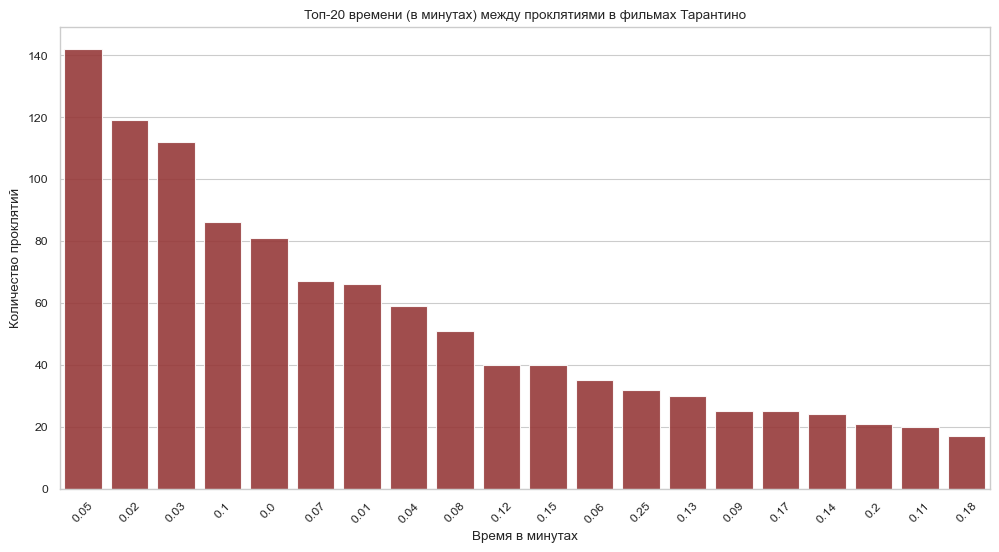

In [119]:
# Визуализация времени распределения проклятий.
plt.figure(figsize=(12, 6))
top_distribution_time = distribution_time_between_curses.head(20)
ax = sns.barplot(x='minutes_in', y='count', data=top_distribution_time, color='brown', alpha=0.9, legend=False)
# Переименовываю оси X и Y.
ax.set(xlabel='Время в минутах', ylabel='Количество проклятий') 
plt.title('Топ-20 времени (в минутах) между проклятиями в фильмах Тарантино')
plt.xticks(rotation=45)
plt.show()